## Métodos de Otimização: Métodos Heuristicos

### Recozimento Simulado

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
from scipy.stats import qmc

In [2]:
def f(x):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x[0])+'\n')
    f.write(str(x[1]))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [3]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

In [17]:
# Método Baseado no algoritmo de Metropolis-Hasting
T = 600 #Temperatura inicial

nvar=2
Ns=20
Nit=5
RT=0.8
niter_max = 50
#chute incial:
x1 = 3
x2 = 3

xnew=np.zeros(nvar, dtype='float')
xold=np.zeros(nvar, dtype='float')
xbest=np.zeros(nvar, dtype='float')
N=np.zeros(nvar, dtype='float')
Vu=np.zeros(nvar, dtype='float')
V=3*np.ones(nvar, dtype='float')
layout = "{0:.5f}"

xold[0]=x1; xold[1]=x2; Fold = f(xold)
xbest = xold.copy(); fbest = f(xold)
c = 2
niter = 0
print("Valor de N: "+layout.format(N[0])+" "+layout.format(N[1]))
print("Valor de V: "+layout.format(V[0])+" "+layout.format(V[1]))
while niter<niter_max:
    for k in range(0,Nit):
        N=np.zeros(nvar, dtype='float')
        for j in range(0,Ns):
            for i in range(0,nvar):
                xnew = xold.copy()
                R = random.uniform(-1,1)
                xnew[i] = xold[i] + R*V[i]
                if f(xnew) < f(xold):
                    xold = xnew.copy()
                    N[i] = N[i] + 1
                    if f(xnew) < fbest:
                        fbest = f(xnew)
                        xbest = xnew.copy()
                else:
                    P = np.exp((f(xold)-f(xnew))/T)
                    R = random.uniform(0,1)
                    if P > R:
                        xold = xnew.copy()
                        N[i] = N[i] + 1
        for i in range(0,nvar):
            if N[i]>0.6*Ns:
                Vu[i] = V[i]*(1 + c*(N[i]/Ns-0.6)/0.4)
            elif N[i]<0.4*Ns:
                Vu[i] = V[i]/(1+c*(0.4-N[i]/Ns)/0.4)
            else:
                Vu[i] = V[i]
        V = Vu.copy()
    T = T*RT
    print("Coordenadas: " + layout.format(xbest[0])+" "+layout.format(xbest[1])+" "+"Resultado: "+layout.format(fbest))
    print("Valor de N: "+layout.format(N[0])+" "+layout.format(N[1]))
    print("Valor de V: "+layout.format(V[0])+" "+layout.format(V[1]))
    niter += 1

Valor de N: 0.00000 0.00000
Valor de V: 3.00000 3.00000
Coordenadas: 5.67588 5.41618 Resultado: -17.74977
Valor de N: 8.00000 11.00000
Valor de V: 17.32500 22.50000
Coordenadas: 5.67588 5.41618 Resultado: -17.74977
Valor de N: 7.00000 10.00000
Valor de V: 18.48000 15.00000
Coordenadas: 5.67588 5.41618 Resultado: -17.74977
Valor de N: 17.00000 6.00000
Valor de V: 20.79000 10.00000
Coordenadas: 5.67588 5.41618 Resultado: -17.74977
Valor de N: 12.00000 6.00000
Valor de V: 10.39500 8.33333
Coordenadas: 5.15408 5.54046 Resultado: -18.13369
Valor de N: 15.00000 11.00000
Valor de V: 15.59250 10.00000
Coordenadas: 5.15408 5.54046 Resultado: -18.13369
Valor de N: 10.00000 12.00000
Valor de V: 12.47400 11.66667
Coordenadas: 5.33876 5.50075 Resultado: -18.39136
Valor de N: 6.00000 11.00000
Valor de V: 6.65280 7.77778
Coordenadas: 5.33876 5.50075 Resultado: -18.39136
Valor de N: 13.00000 15.00000
Valor de V: 11.64240 13.61111
Coordenadas: 5.39867 5.35705 Resultado: -18.53654
Valor de N: 8.00000 8.

In [18]:
print(T)

0.008563486156235783


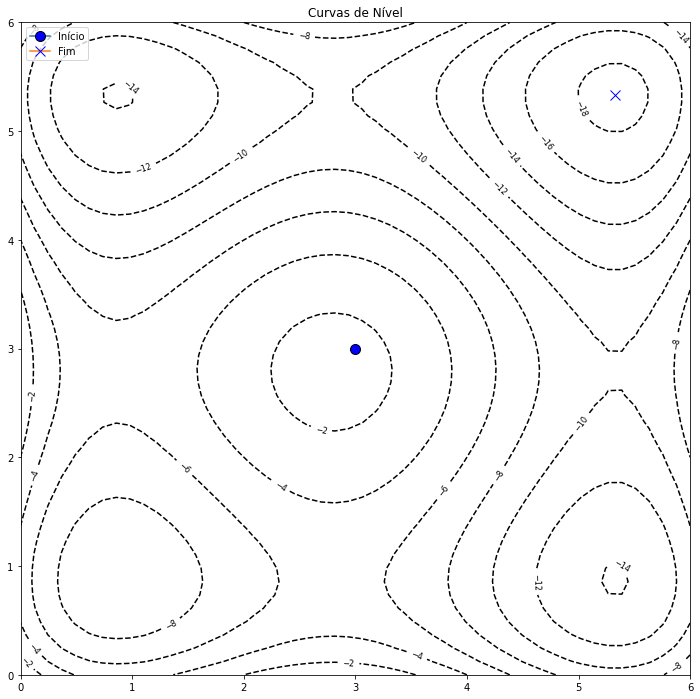

In [19]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(x1, x2, marker="o", markersize=10, markeredgecolor="k", markerfacecolor="b")
plt.plot(xbest[0], xbest[1], marker="x", markersize=10, markeredgecolor="b", markerfacecolor="b")
plt.legend(['Início', 'Fim'], loc='upper left')
plt.show()